Support Vector Machine -- Decision Tree -- Naive Bayes Gaussian -- Logistic Regression -- Random Forest -- Gradient Boosting

In [1]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import time
from collections import defaultdict

# Data Analysis Libraries
from sklearn.base import clone
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,  RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.multiclass import OneVsRestClassifier


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
csv_file = 'CICDDoS-Real/cicddos2019_cleaned.csv'
df = pd.read_csv(csv_file, low_memory=False)
df.shape

(360000, 88)

In [3]:
# Mengacak seluruh baris DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

### Informasi Dataset

In [4]:
#info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360000 entries, 0 to 359999
Data columns (total 88 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   360000 non-null  int64  
 1   Flow ID                      360000 non-null  object 
 2   Source IP                    360000 non-null  object 
 3   Source Port                  360000 non-null  int64  
 4   Destination IP               360000 non-null  object 
 5   Destination Port             360000 non-null  int64  
 6   Protocol                     360000 non-null  int64  
 7   Timestamp                    360000 non-null  object 
 8   Flow Duration                360000 non-null  int64  
 9   Total Fwd Packets            360000 non-null  int64  
 10  Total Backward Packets       360000 non-null  int64  
 11  Total Length of Fwd Packets  360000 non-null  float64
 12  Total Length of Bwd Packets  360000 non-null  float64
 13 

In [5]:
#Bagian awal dataset
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,28102,172.16.0.5-192.168.50.1-553-11930-17,172.16.0.5,553,192.168.50.1,11930,17,2018-12-01 11:23:04.133911,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
1,17675,172.16.0.5-192.168.50.1-997-4051-17,172.16.0.5,997,192.168.50.1,4051,17,2018-12-01 11:32:18.205323,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
2,661545,172.16.0.5-192.168.50.1-27238-3411-6,172.16.0.5,27238,192.168.50.1,3411,6,2018-12-01 13:31:10.155752,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn
3,688385,172.16.0.5-192.168.50.1-36181-39435-6,172.16.0.5,36181,192.168.50.1,39435,6,2018-12-01 13:30:48.279274,51,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn
4,16016,172.16.0.5-192.168.50.1-35261-14404-17,172.16.0.5,35261,192.168.50.1,14404,17,2018-12-01 13:02:49.155721,105961,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP


In [6]:
df.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,360000.000000,360000.000000,360000.000000,360000.000000,3.600000e+05,360000.000000,360000.000000,3.600000e+05,3.600000e+05,360000.000000,...,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05,360000.000000
mean,91493.758128,26078.477756,30912.601833,14.700269,2.200160e+06,8.975250,0.585044,3.733058e+03,3.847677e+02,582.758328,...,-3.609785e+07,7.325171e+03,2.620700e+03,1.084865e+04,5.733338e+03,6.801519e+05,1.105356e+05,8.047233e+05,5.820746e+05,0.930525
std,135889.709116,25364.107740,20110.524442,4.502866,1.275317e+07,250.280517,12.328315,3.287519e+04,3.131816e+04,544.547707,...,1.925211e+08,1.685573e+05,7.402011e+04,2.224704e+05,1.570655e+05,4.457633e+06,1.025535e+06,5.103451e+06,4.112389e+06,0.254261
min,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,11986.000000,771.000000,13028.000000,17.000000,1.000000e+00,2.000000,0.000000,4.580000e+02,0.000000e+00,229.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,38063.500000,21346.500000,30909.000000,17.000000,2.000000e+00,2.000000,0.000000,1.088000e+03,0.000000e+00,415.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,106306.000000,52107.250000,48665.000000,17.000000,1.821250e+03,4.000000,0.000000,2.944000e+03,0.000000e+00,1035.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,805151.000000,65534.000000,65535.000000,17.000000,1.200000e+08,86220.000000,4602.000000,1.526642e+07,8.818824e+06,32120.000000,...,1.480000e+03,1.721058e+07,2.284064e+07,4.358468e+07,1.310114e+07,1.058368e+08,6.600292e+07,1.058368e+08,1.058368e+08,1.000000


In [7]:
df['Label'].value_counts()

Label
DrDoS_LDAP       30000
Syn              30000
DrDoS_UDP        30000
DrDoS_NetBIOS    30000
DrDoS_MSSQL      30000
DrDoS_DNS        30000
DrDoS_SSDP       30000
DrDoS_SNMP       30000
DrDoS_NTP        30000
TFTP             30000
UDP-lag          30000
BENIGN           30000
Name: count, dtype: int64

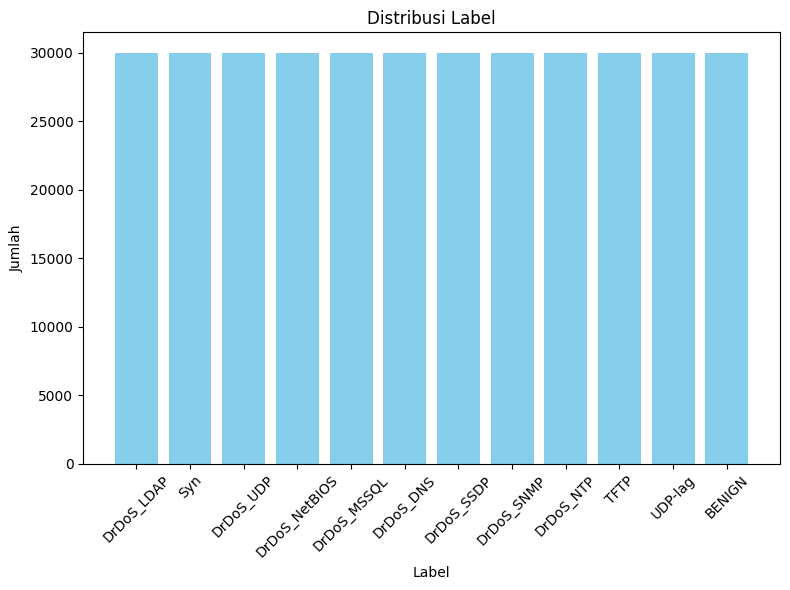

In [8]:
# Hitung jumlah masing-masing label
label_counts = df['Label'].value_counts()

# Buat bar chart
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Distribusi Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

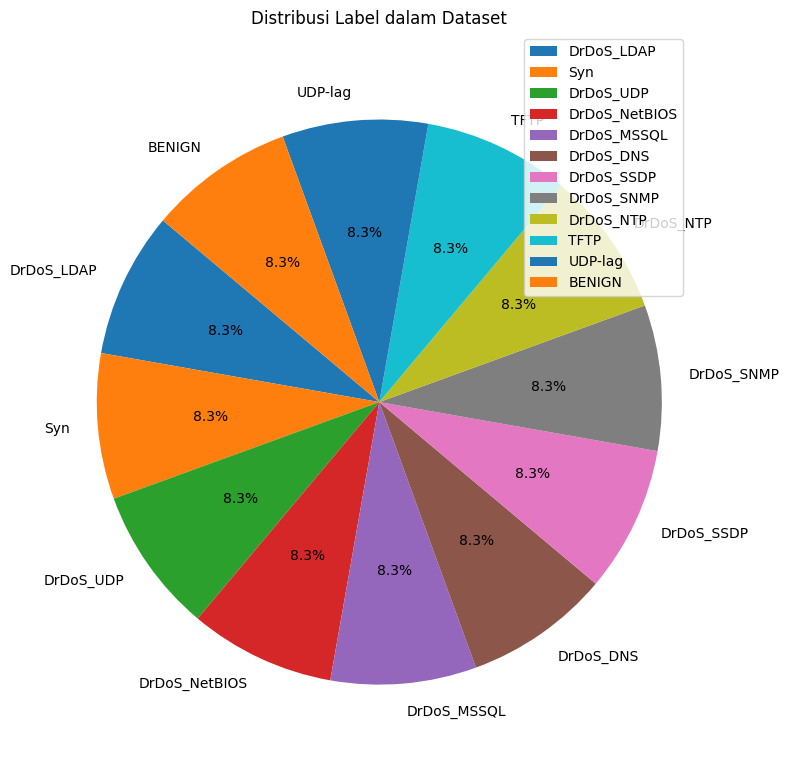

In [9]:
# Hitung jumlah masing-masing label
label_counts = df['Label'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.legend()
plt.title('Distribusi Label dalam Dataset')
plt.axis('equal')  # Agar bentuk pie-nya bulat
plt.tight_layout()
plt.show()

In [10]:
# Menampilkan jumlah sample tiap protocol. '17' = UDP. '6' = TCP. '0' = HOPOPT (IPv6 Hop-by-Hop Option)
df['Protocol'].value_counts()

Protocol
17    285251
6      73805
0        944
Name: count, dtype: int64

### Drop and Encoding Label

In [11]:
df = df.drop(['Flow ID', 'Source IP', 'Destination IP', 'Source Port', 'Destination Port', 'Timestamp', 'SimillarHTTP', 'Fwd Header Length.1'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360000 entries, 0 to 359999
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   360000 non-null  int64  
 1   Protocol                     360000 non-null  int64  
 2   Flow Duration                360000 non-null  int64  
 3   Total Fwd Packets            360000 non-null  int64  
 4   Total Backward Packets       360000 non-null  int64  
 5   Total Length of Fwd Packets  360000 non-null  float64
 6   Total Length of Bwd Packets  360000 non-null  float64
 7   Fwd Packet Length Max        360000 non-null  float64
 8   Fwd Packet Length Min        360000 non-null  float64
 9   Fwd Packet Length Mean       360000 non-null  float64
 10  Fwd Packet Length Std        360000 non-null  float64
 11  Bwd Packet Length Max        360000 non-null  float64
 12  Bwd Packet Length Min        360000 non-null  float64
 13 

In [12]:
# Pengubahan nilai dari string (kategorikal) ke numerik
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

label_mapping = pd.DataFrame({
    'Original Label': le.classes_,
    'Encoded Value': range(len(le.classes_))
})

print("Mapping of original labels to encoded values:")
print(label_mapping)

Mapping of original labels to encoded values:
   Original Label  Encoded Value
0          BENIGN              0
1       DrDoS_DNS              1
2      DrDoS_LDAP              2
3     DrDoS_MSSQL              3
4       DrDoS_NTP              4
5   DrDoS_NetBIOS              5
6      DrDoS_SNMP              6
7      DrDoS_SSDP              7
8       DrDoS_UDP              8
9             Syn              9
10           TFTP             10
11        UDP-lag             11


In [13]:
# Menampilkan sampel data setelah encoding (sudah bernilai numerikal)
df.loc[:,['Label']].head()

,Label
0,2
1,2
2,9
3,9
4,8


### X dan Y

In [14]:
X = df.drop(['Label'], axis=1)
y = df['Label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Feature Selection Mutual Information

#### StandarScaler

In [16]:
categorical_features = ['Protocol', 'Inbound']
numerical_features = [col for col in X_train.columns if col not in categorical_features]

In [17]:
# Copy data asli untuk jaga-jaga
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [18]:
# Standarisasi fitur numerik saja
scaler = StandardScaler()

# Standarisasi hanya fitur numerik, simpan hasil ke variabel baru
X_train_scaled = X_train_copy.copy()
X_test_scaled = X_test_copy.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train_copy[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test_copy[numerical_features])

In [19]:
# Opsional: Kalau mau konversi ke array, tinggal pakai
X_train_scaled_array = X_train_scaled.to_numpy()
X_test_scaled_array = X_test_scaled.to_numpy()

#### Mutual Information

In [ ]:
# Menentukan jumlah fitur yang ingin dipertahankan
num_features_to_retain = 25

# Menghitung skor mutual information hanya pada data latih yang sudah distandarisasi
mi_scores = mutual_info_classif(X_train_scaled, y_train)

# Mendapatkan indeks fitur-fitur dengan skor tertinggi
selected_features = np.argsort(mi_scores)[-num_features_to_retain:]

# Menampilkan indeks fitur terpilih
print("Selected feature indices:", selected_features)

Selected feature indices: [65 22 34 23 21 17 20  0 18 67  1 16 15 36 38 14  7 62  4  6  8 53 39 52
 40]


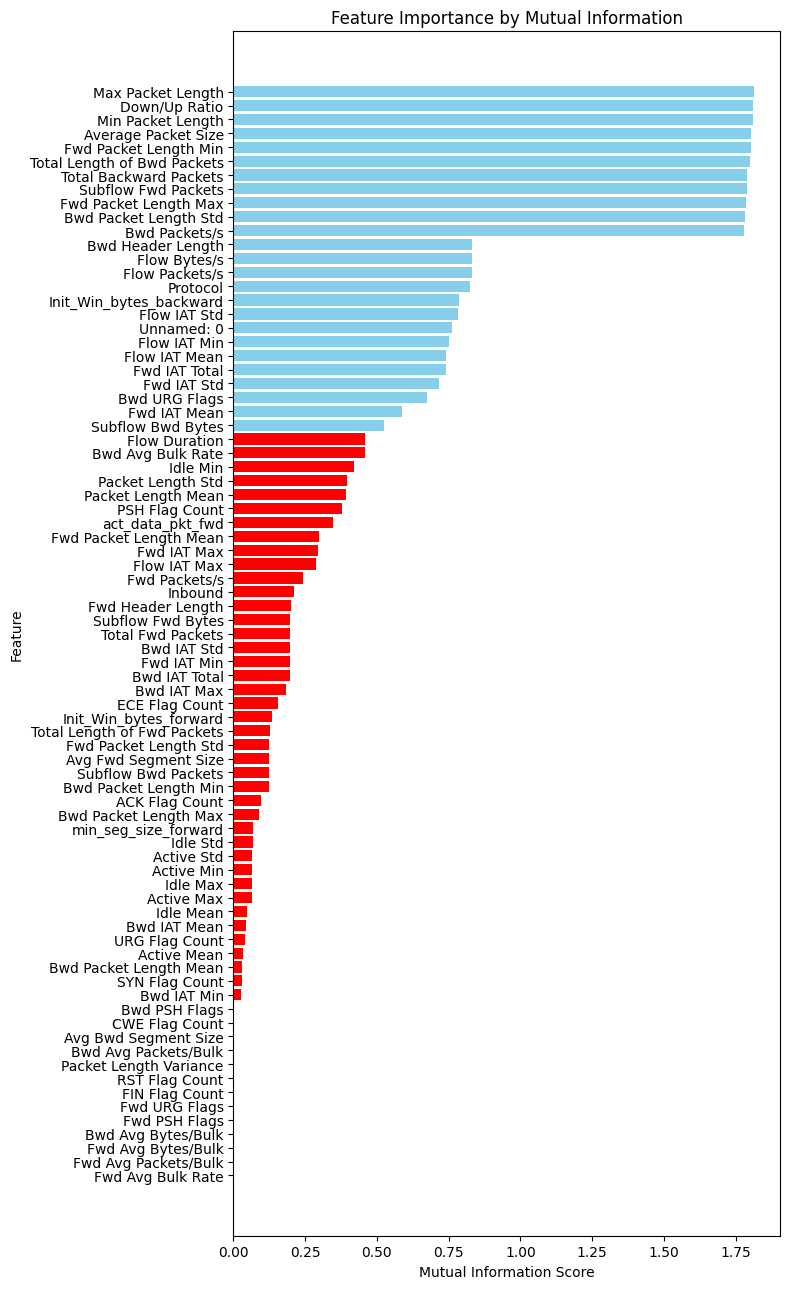

In [12]:
feature_names = X_train.columns

# Buat DataFrame untuk visualisasi skor MI
ranking_df = pd.DataFrame({
    'Feature': feature_names,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

# Warnai bar merah untuk fitur yang terpilih, biru lainnya
colors = ['skyblue' if i in selected_features else 'red' for i in ranking_df.index]

plt.figure(figsize=(8, 13))
plt.barh(ranking_df['Feature'], ranking_df['MI Score'], color=colors)
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Feature Importance by Mutual Information')
plt.gca().invert_yaxis()  # Biar fitur dengan skor tertinggi di atas
plt.tight_layout()
plt.show()

In [20]:
selected_features = [66, 23, 35, 24, 22, 18, 21, 0, 19, 68, 2, 17, 16, 37, 39, 15,  8, 63, 5, 7, 9, 54, 40, 53, 41]

In [21]:
X_train_selected_scaled = X_train_scaled.iloc[:, selected_features]
X_test_selected_scaled = X_test_scaled.iloc[:, selected_features]

In [25]:
# Ambil nama fitur yang dipilih dari selected_features (indeks)
selected_feature_names = feature_names[selected_features]

print(f"Jumlah fitur terpilih: {selected_feature_names.size}")
selected_feature_names.to_list()

NameError: name 'feature_names' is not defined

### ROC-AUC

In [22]:
# Binarisasi label multiclass
classes = np.unique(y)
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

#### ROC ver.2.

In [24]:
import joblib
import glob

In [27]:
# Binarisasi untuk evaluasi saja
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

In [ ]:
base_learners_1 = [
    ("LR", LogisticRegression(max_iter=5000, C= 10, penalty= 'l2', solver= 'newton-cg')),
    ("SVM", OneVsRestClassifier(SVC(kernel='rbf', C=1, gamma='scale', random_state=42, probability=True))),
    ("RF", RandomForestClassifier(n_estimators=300, max_depth=20, max_features="log2", min_samples_leaf=4, random_state=42)),
    ("KNN", KNeighborsClassifier(metric= 'minkowski', n_neighbors= 9, p= 1, weights= 'uniform')),
    ("DT", DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= None, min_samples_leaf= 2, min_samples_split= 2,  random_state=42)),
    ("XGBoost", xgb.XGBClassifier(tree_method="hist", gamma= 0.3, learning_rate= 0.1, max_depth= 5, n_estimators= 300, reg_alpha= 0.01, reg_lambda= 2, random_state=42))
]

# Definisikan meta learner
meta_learner_1 =  LogisticRegression(max_iter=5000, C= 10, penalty= 'l2', solver= 'newton-cg')

modelss = {
    "Stacking-1": StackingClassifier(estimators=base_learners_1, final_estimator=meta_learner_1, cv=3, n_jobs=-1, passthrough=True, verbose=3)
}

In [ ]:
models = {
    "NB": OneVsRestClassifier(GaussianNB(var_smoothing= np.float64(1e-06))),
    "LR": OneVsRestClassifier(LogisticRegression(max_iter=5000, C= 10, penalty= 'l2', solver= 'newton-cg')),
    "DT": OneVsRestClassifier(DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= None, min_samples_leaf= 2, min_samples_split= 2,  random_state=42)),
    "SVM": OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma='scale', random_state=42, probability=True)),
    "AB": AdaBoostClassifier(learning_rate= 1, n_estimators= 300),
    "XGB": xgb.XGBClassifier(tree_method="hist", n_estimators=300,gamma=0.3, learning_rate=0.1, max_depth=5, reg_alpha=0.01, reg_lambda=2, random_state=42),
    "RF": RandomForestClassifier(n_estimators=300, max_depth=20, max_features="log2", min_samples_leaf=4, random_state=42),
    "KNN": KNeighborsClassifier(metric= 'minkowski', n_neighbors= 9, p= 1, weights= 'uniform')
}

In [33]:
# Loop semua model dan simpan satu per satu
for name, model in models.items():
    model.fit(X_train_selected_scaled, y_train_bin)
    y_score = model.predict_proba(X_test_selected_scaled)

    # Save model
    filename = f'model_{name.replace(" ", "_").lower()}.joblib'
    joblib.dump(model, f'model_roc_tes/{filename}')
    
    # Save hasil predict_proba
    np.save(f'model_roc_tes/y_score_{name.replace(" ", "_").lower()}.npy', y_score)
    
    print(f'Model dan hasil prediksi {name} berhasil disimpan.')

Model dan hasil prediksi Naive Bayes berhasil disimpan.
Model dan hasil prediksi Logistic Regression berhasil disimpan.
Model dan hasil prediksi Decision Tree berhasil disimpan.


In [28]:
# Cari semua file .npy di folder saat ini
joblib_files = glob.glob('model_roc_mi/*.joblib')
joblib_files

['model_roc_mi\\stacking_proposed_false_mi.joblib',
 'model_roc_mi\\stacking_proposed_true_mi.joblib']

In [29]:
# Training model
for file_name in joblib_files:
    # Ambil nama model dari nama file
    model_name = file_name.replace('model_roc_mi\\', '') \
                          .replace('model_roc_mi/', '') \
                          .replace('.joblib', '') \
                          .replace('_', ' ')

    print(f"\n🔍 Memproses model: {model_name}")

    # model.fit(X_train_selected_scaled, y_train)  # tetap pakai label asli
    model = joblib.load(file_name)

    y_score = model.predict_proba(X_test_selected_scaled)

    # Save model dan score
    np.save(f'model_roc_mi/y_score_{model_name}.npy', y_score)

    # Hitung ROC AUC
    roc_auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
    print(f'ROC AUC {model_name}: {roc_auc:.4f}')


🔍 Memproses model: stacking proposed false mi


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ROC AUC stacking proposed false mi: 0.9832

🔍 Memproses model: stacking proposed true mi


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ROC AUC stacking proposed true mi: 0.9832


In [40]:
# Cari semua file .npy di folder saat ini
npy_files = glob.glob('model_roc_mi/*.npy')
print(npy_files)  # Untuk cek nama filenya

['model_roc_mi\\y_score_AB.npy', 'model_roc_mi\\y_score_DT.npy', 'model_roc_mi\\y_score_KNN.npy', 'model_roc_mi\\y_score_LR.npy', 'model_roc_mi\\y_score_NB.npy', 'model_roc_mi\\y_score_RF.npy', 'model_roc_mi\\y_score_stacking proposed false.npy', 'model_roc_mi\\y_score_stacking proposed true.npy', 'model_roc_mi\\y_score_SVM.npy', 'model_roc_mi\\y_score_XGB.npy']


Processing: AB
Processing: DT
Processing: KNN
Processing: LR
Processing: NB
Processing: RF
Processing: stacking proposed false
Processing: stacking proposed true
Processing: SVM
Processing: XGB


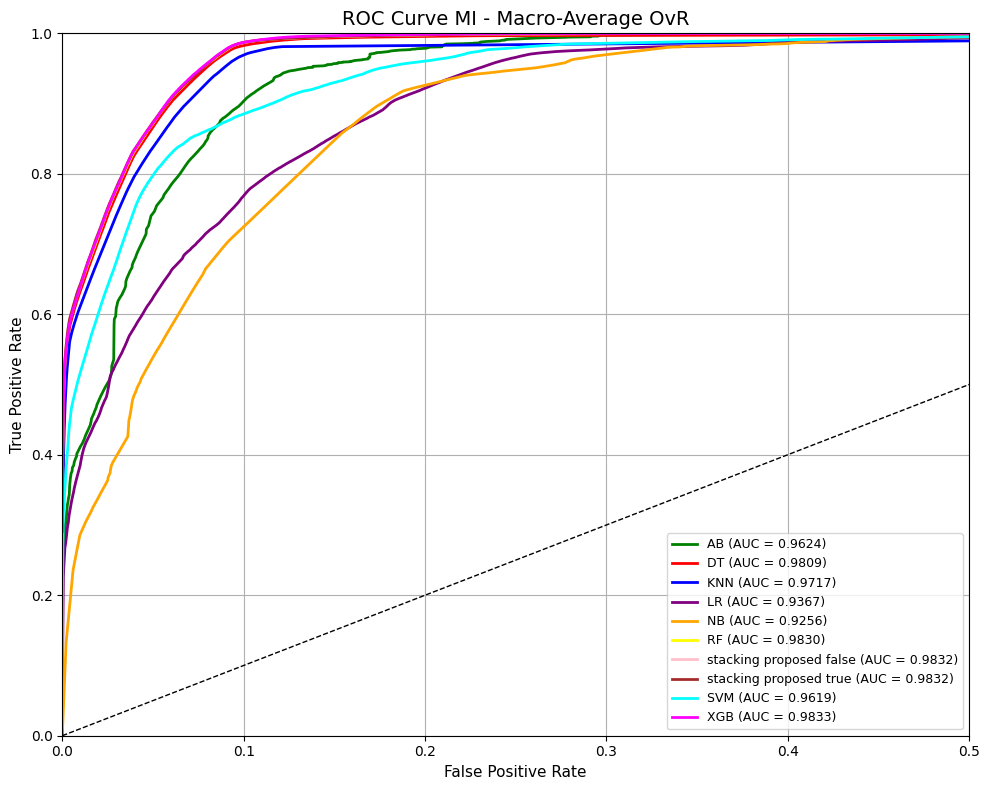

In [41]:
colors = [
    'green', 'red', 'blue', 'purple', 'orange', 'yellow', 'pink',
    'brown', 'cyan', 'magenta', 'lime', 'gray', 'olive', 'teal', 'navy',
    'gold', 'coral', 'darkgreen', 'maroon', 'lightblue', 'chocolate', 'darkcyan', 'crimson'
]

plt.figure(figsize=(10, 8))

for file_name, color in zip(npy_files, colors):
    model_name = file_name.replace('model_roc_mi\\y_score_', '') \
                          .replace('model_roc_mi/y_score_', '') \
                          .replace('.npy', '') \
                          .replace('_', ' ')
    
    print(f"Processing: {model_name}")
    y_score = np.load(file_name)

    # Hitung ROC dan AUC untuk setiap kelas
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Hitung average macro ROC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    auc_macro = auc(all_fpr, mean_tpr)

    # Plot macro-average ROC curve
    plt.plot(all_fpr, mean_tpr, color=color,
             label=f"{model_name} (AUC = {auc_macro:.4f})", lw=2)

# Baseline diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Fokus area
plt.xlim([0.0, 0.5])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.title('ROC Curve MI - Macro-Average OvR', fontsize=14)
plt.legend(loc="lower right", fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Loop semua model dan simpan satu per satu
for name, model in modelss.items():
    model.fit(X_train_selected_scaled, y_train)
    y_score = model.predict_proba(X_test_selected_scaled)

    # Save model
    filename = f'model_{name.replace(" ", "_").lower()}.joblib'
    joblib.dump(model, f'model_roc_mi/{filename}')
    
    # Save hasil predict_proba
    np.save(f'model_roc_mi/y_score_{name.replace(" ", "_").lower()}.npy', y_score)
    
    print(f'Model dan hasil prediksi {name} berhasil disimpan.')

['model_roc_mi\\y_score_AB.npy', 'model_roc_mi\\y_score_DT.npy', 'model_roc_mi\\y_score_knn-test.npy', 'model_roc_mi\\y_score_knn.npy', 'model_roc_mi\\y_score_LR.npy', 'model_roc_mi\\y_score_NB.npy', 'model_roc_mi\\y_score_RF.npy', 'model_roc_mi\\y_score_SVM.npy', 'model_roc_mi\\y_score_XGB.npy']
Processing: AB
Processing: DT
Processing: knn-test
Processing: knn
Processing: LR
Processing: NB
Processing: RF
Processing: SVM


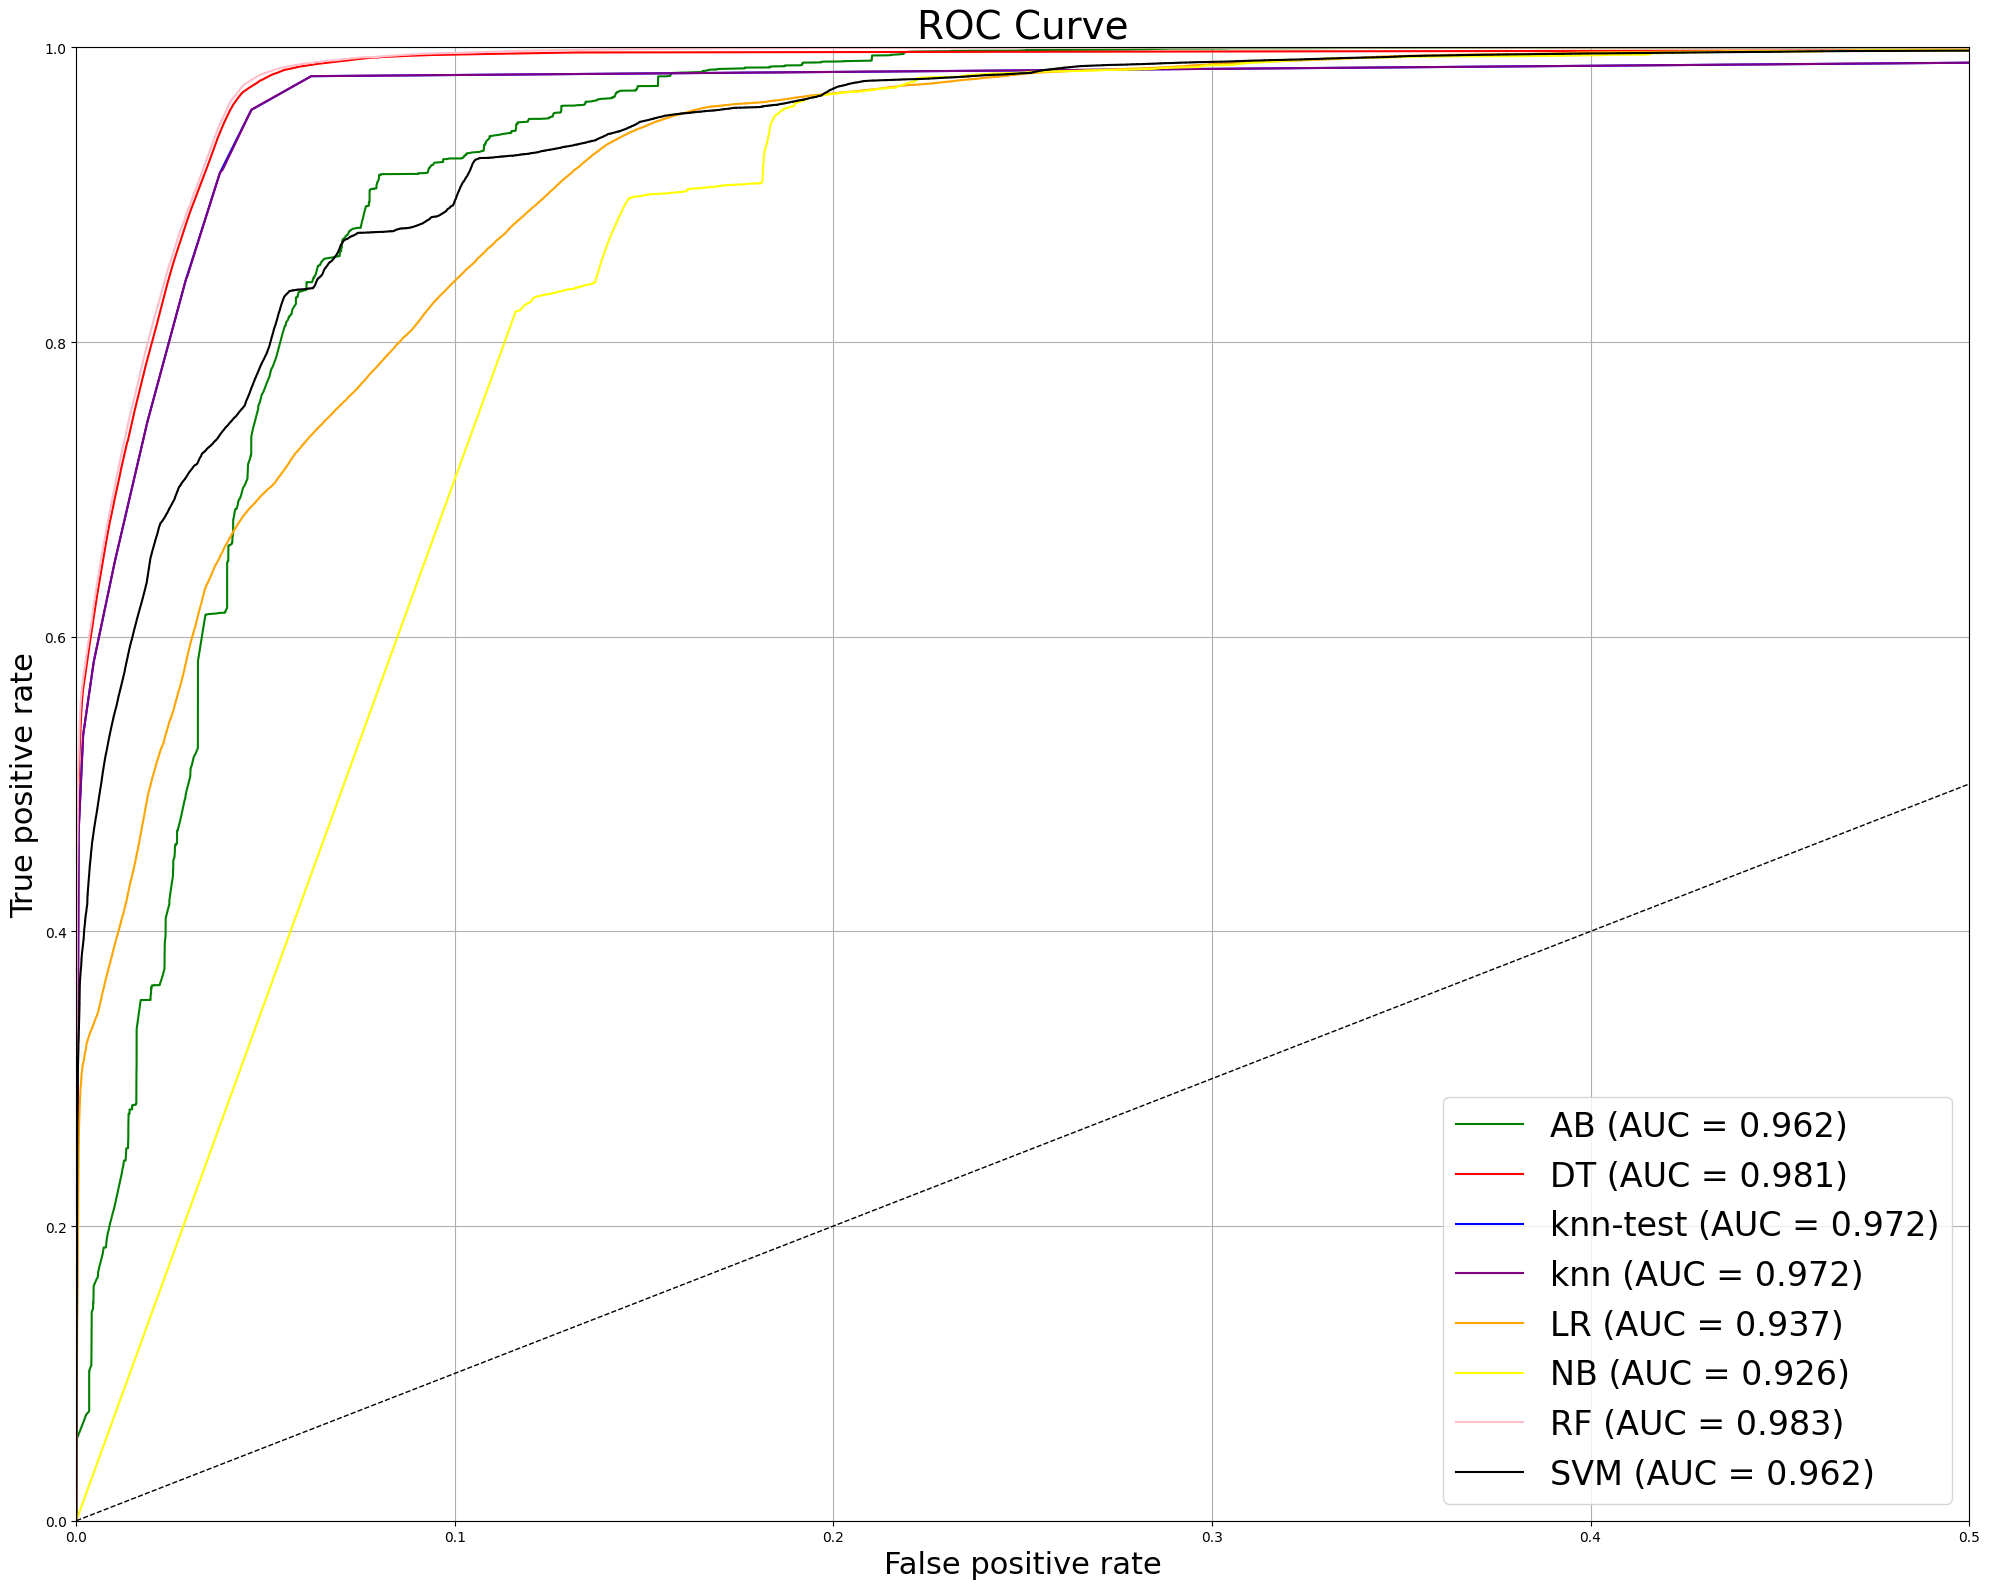

In [19]:
# List warna untuk tiap model
colors = ['green', 'red', 'blue', 'purple', 'orange', 'yellow', 'pink', 'black']

# Cari semua file .npy di folder saat ini
npy_files = glob.glob('model_roc_mi/*.npy')
print(npy_files)  # Untuk cek nama filenya

plt.figure(figsize=(20, 16))

# Loop setiap file dan warna
for file_name, color in zip(npy_files, colors):
    
    # Ambil nama model dari nama file, buang ekstensi
    model_name = file_name.replace('model_roc_mi\\y_score_', '') \
                      .replace('model_roc_mi/y_score_', '') \
                      .replace('.npy', '') \
                      .replace('_', ' ')
    
    print(f"Processing: {model_name}")
    
    # Load hasil prediksi
    y_score = np.load(file_name)
    
    # Hitung ROC macro-average
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    auc_score = roc_auc_score(y_test_bin, y_score, average='macro')

    # Plot ROC Curve
    plt.plot(fpr, tpr, lw=1.5, markersize=2, color=color, label=f"{model_name} (AUC = {auc_score:.3f})")

# Garis diagonal baseline
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Zoom area kritis FPR kecil
plt.xlim([0.0, 0.5])   # Fokus FPR 0 - 0.2
plt.ylim([0.0, 1.0])   # Fokus TPR 0.8 - 1.0

plt.xlabel('False positive rate', fontsize=22)
plt.ylabel('True positive rate', fontsize=22)
plt.title('ROC Curve', fontsize=28)
plt.legend(loc="lower right", fontsize=24)
plt.grid(True)
plt.tight_layout()
plt.show()
